**NOTA**

Questo è un jupyter notebook. Perché funzioni:
1. Cliccare su Select Kernel in alto a dx
2. Selezionare Python Environments
3. Scegliere l'ambiente DEEPLABCUT (se non presente vedi: https://deeplabcut.github.io/DeepLabCut/docs/installation.html#conda-the-installation-process-is-as-easy-as-this-figure)

**NOTA**

In alternativa (alla via "programmatica") si può usare l'interfaccia grafica (GUI) di DeepLabCut (che però a me non ha funzionato per ogni step) come segue:
1. Lanciare Anaconda Navigator
2. Aprire da lì il cmd.exe (terminale)
3. Digitare `conda activate DEEPLABCUT`
4. Digitare `python -m deeplabcut`

**Prima di proseguire**

Questo jupyter notebook deve essere già nel folder del progetto (e.g. dentro un folder univocamente identificabile).

In [ ]:
import deeplabcut
import os
from tkinter import Tk, filedialog

In [ ]:
# Crea un nuovo progetto

### EDITA SOLO QUI ###
project_name = ""
your_name = ""
multianimal = True # Boolean, per la scelta vedi https://deeplabcut.github.io/DeepLabCut/docs/UseOverviewGuide.html#what-scenario-do-you-have
working_directory = os.path.abspath("__file__") # ora la wd è quella in cui è contenuta questo notebook
######################

deeplabcut.create_new_project(project_name, your_name, multianimal=multianimal, working_directory=working_directory)

In [ ]:
# Crea stringa con percorso al file di configurazione (.yaml)
config_path = os.path.join('..', 'config.yaml') # '..' indica la parent directory

In [ ]:
# Utility per creare la lista di video

def select_videos():
    print("Seleziona una cartella contenente i video.")

    # Funzione per ottenere la cartella selezionata dall'utente
    def select_folder():
        root = Tk()
        root.withdraw()  # Nasconde la finestra principale
        folder_selected = filedialog.askdirectory(title="Seleziona una cartella")
        return folder_selected
    
    # Ottieni la cartella selezionata dall'utente
    folder_path = select_folder()
    
    # Inizializza una lista per contenere i percorsi dei video
    video_list = []
    
    # Scansiona la cartella selezionata e aggiungi i video alla lista
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.mp4', '.avi', '.mov', '.mkv')):
            video_list = os.path.join(folder_path, file_name)
            video_list.append(video_list)
    
    # Ritorna la lista dei percorsi dei video
    return video_list

In [ ]:
# Aggiungi nuovi video al progetto
# Tipicamente i video saranno gli stessi per il training e per il testing
# è necessario copiarli con l'argomento copy_videos=False per ridurre il peso della working directory
# (è possibile settare copy_videos=True SOLO SE i video sono pochi e piccoli)

video_list = select_videos() # Seleziona cartella contenente i video

deeplabcut.add_new_videos(config_path, video_list, copy_videos=False)

**Prima di proseguire**

Ora è il momento di editare il file `config.yaml`.

Questo può essere fatto in 2 modi:
+ Editando direttamente il file in un qualsiasi editor di testo
+ Usando la `funzione deeplabcut.auxiliaryfunctions.edit_config(config_path, edits)` dove `edits` è un dizionario del tipo:
```python
edits = {'colormap': 'summer',
         'individuals': ['mickey', 'minnie', 'bianca'],
         'skeleton': [['snout', 'tailbase'], ['snout', 'rightear']]}
```

Qui sotto si usa la funzione per modificare il file in maniera semplificata per alcuni campi essenziali.

In [ ]:
edits = {
    'individuals': ['individual1',
                    'individual2',
                    'individual3',
                    'individual4',
                    'individual5',
                    'individual6',
                    'individual7',
                    'individual8',
                    'individual9',
                    'individual10',
                    'individual11',
                    'individual12',
                    'individual13',
                    'individual14',
                    'individual15',
                    'individual16',
                    'individual17',
                    'individual18',
                    'individual19',
                    'individual20',
                    'individual21',
                    'individual22',
                    'individual23',
                    'individual24',
                    'individual25',
                    'individual26',
                    'individual27',
                    'individual28',
                    'individual29',
                    'individual30',
                    'individual31',
                    'individual32',
                    'individual33',
                    'individual34',
                    'individual35'],

    'uniquebodyparts': ['BitingFlag'], # Per tutti gli oggetti unici (ovvero che compaiono solo una volta in ogni frame e.g. mangiatoia)

    'multianimalbodyparts': ['Nose',
                             'LeftEar',
                             'RightEar',
                             'TailStart',
                             'TailEnd'], # Per le bodyparts che compaiono più di una volta

    # Skeleton "insegna" alla rete neurale come individuare lo scheletro e quindi la relazione tra diverse parti del corpo osservate
    # Il formato è una lista di liste
    # Ogni sotto-lista contiene una point-to-point connection
    'skeleton': [['Nose', 'LeftEar'],
                ['Nose', 'RightEar'],
                ['Nose', 'TailStart'],
                ['TailStart', 'TailEnd']],

    'identity': False, # True se possiamo distinguere ogni singolo animale, False altrimenti
}

# Chiamata alla funzione per modificare effettivamente config.yaml
deeplabcut.auxiliaryfunctions.edit_config(config_path, edits)

In [ ]:
# Frame extraction

# Si usi mode='manual' per lanciare la GUI per l'estrazione manuale.
# Questo metodo è praticamente necessario se si vuole classificare un comportamento (e.g. tail biting)

# Quando crop=True l'utente deve ritagliare (tramite GUI) l'immagine catturata dalla telecamera
# N.B. IMPORTANTE ridurre al massimo il frame size (tagliare tutte le parti in cui i suini non arrivano)

# userfeedback=True per "disattivare" il feedback

deeplabcut.extract_frames(config_path, mode='manual', userfeedback=False, crop=True)

**Prima di proseguire**

Ora abbiamo selezionato i frame di interesse. Può essere utile a questo punto "copiare" la cartella su altri computer per dividersi il lavoro di labelling che deve essere fatto a mano.

In [ ]:
# Frame labelling
deeplabcut.label_frames(config_path)

In [ ]:
# Check labels
# Controlla se le labels sono state create e salvate correttamente
# Inoltre per ogni video-directory in labeled-data crea una sub-directory con suffisso "labeled"
# Se visualizeindividuals=True il labelling è distinto per ogni individuo
# Si può chiamare la funzione due volte per avere entrambi gli output
deeplabcut.check_labels(config_path, visualizeindividuals=False)
#deeplabcut.check_labels(config_path, visualizeindividuals=True)

In [ ]:
# Configurazione dei parametri per la rete neurale
deeplabcut.create_multianimaltraining_dataset(config_path, paf_graph='config')

**Modifica del file `pose_cfg.yaml`**

A questo punto si può/deve modificare il file `pose_cfg.yaml`. I parametri d'interesse sono dati nel Box2:

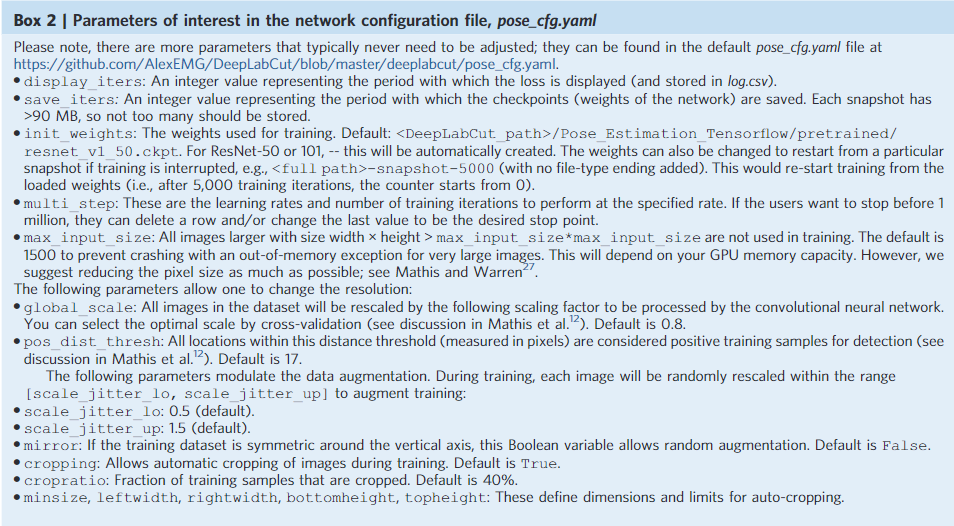

Altri parametri (che normalmente non necessitano modifiche possono essere trovati qui: https://deeplabcut.github.io/DeepLabCut/docs/recipes/pose_cfg_file_breakdown.html)


+ `displayiters`: this variable is actually set in pose_config.yaml. However, you can overwrite it with this hack. Don't use this regularly, just if you are too lazy to dig out the pose_config.yaml file for the corresponding project. If None, the value from there is used, otherwise it is overwritten! Default: None
+ `saveiters`: this variable is actually set in pose_config.yaml. However, you can overwrite it with this hack. Don't use this regularly, just if you are too lazy to dig out the pose_config.yaml file for the corresponding project. If None, the value from there is used, otherwise it is overwritten! Default: None
+ **TODO:** global_scale sembra un parametro molto interessante da tunare (anche con la CV) per lo meno per ridurre il computational load.
+ **TODO:** scale_jitter_lo/up sono incerto visto che comunque dovremmo ottenere lo stesso effetto solo con la prospettiva (labellare un suino lontano dalla telecamera a jitter=1 è come labellare un suino vicino alla telecamera con jitter=0.5) (?)

# Ora serve la GPU...
Il training e evaluation della NN deve essere fatto con il supporto di una GPU.